# Proyect Wine Quality


Alan Ulises Luna Hernández     // A01424523


Uziel Heredia Estrada          // A01667072


Victor Angel Martínez Vidaurri //  A01665456

# Introduction

In this project, our team analyzes the quality of red wine using the well-known UCI “Wine Quality” dataset. We will work with 1,599 samples and 11 numerical features, to which we have added a categorical variable (`alcohol_level`) so that the data include both numerical and categorical attributes.

The goal is to predict whether a wine’s quality is “low,” “medium,” or “high” based on its physicochemical properties. To achieve this, we will build a preprocessing pipeline that scales numerical features and one-hot encodes the categorical feature, then split the data into training and test sets.

Each team member will train and evaluate a different classifier, alongside a baseline decision tree. Finally, we will combine the best models into an ensemble and compare their performance using appropriate metrics, allowing us to see how each method handles imbalanced data.


## Descripción del Dataset

El conjunto de datos Wine Quality, proviene del repositorio UCI y recoge mediciones fisicoquímicas de vinos de la región del Duero, Portugal. Fue diseñado para estudiar la relación entre las propiedades químicas del vino y la percepción sensorial de su calidad.

- **Instancias**: 1 599 muestras  
- **Variables numéricas (11)**:  
  - fixed acidity (g/dm³)  
  - volatile acidity (g/dm³)  
  - citric acid (g/dm³)  
  - residual sugar (g/dm³)  
  - chlorides (g/dm³)  
  - free sulfur dioxide` (mg/dm³)  
  - total sulfur dioxide` (mg/dm³)  
  - density (g/cm³)  
  - pH  
  - sulphates (g/dm³)  
  - alcohol (% vol.)  

- **Variable objetivo**:  
  - quality (entero de 0 a 10; en la práctica de 3 a 8)  
  - Distribución desbalanceada: la mayoría de muestras se concentran en calidad 5 y 6, y pocas en los extremos.

- **Valores faltantes**: Ninguno.  

- **Rangos y escalado**:  
  - Las magnitudes varían mucho entre columnas, por lo que es imprescindible escalar las variables numéricas antes de entrenar.

- **Variable categórica añadida**:  
  - alcohol_level: tres niveles (“bajo”, “medio”, “alto”) según cuantiles de la columna alcohol.  

Con esta estructura podemos explorar tanto algoritmos que trabajen con datos continuos como aquellos que manejen características categóricas.  


## 3. Preprocesamiento de los Datos

En esta sección transformaremos el dataset para dejarlo listo para modelado:

1. Generar la variable categórica alcohol_level.  
2. Dividir los datos en conjuntos de entrenamiento y prueba.  
3. Construir un pipeline de preprocesamiento que incluya:  
   - Escalado de variables numéricas.  
   - One-hot encoding de la variable categórica.


In [7]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [8]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# 1.1 Obtener dataset
wine_quality = fetch_ucirepo(id=186)

# 1.2 Features y target (aplanamos targets para evitar el ValueError)
X = wine_quality.data.features.copy()
y = pd.Series(
    data=wine_quality.data.targets.values.flatten(),
    name="quality"
)

# 1.3 Mostrar metadata e información de variables
print(wine_quality.metadata)
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## 2. Exploración de Datos

En esta sección examinaremos el contenido del dataset para comprender mejor su estructura y la distribución de la variable objetivo:

1. Vistazo inicial con `head()`  
2. Información general de tipos y conteo de valores con `info()`  
3. Estadísticos descriptivos de las variables numéricas con `describe()`  
4. Detección de valores faltantes  
5. Distribución de la variable `quality`


In [11]:
import matplotlib.pyplot as plt

display(X.head())

# 2.2 Información general
print(X.info())

# 2.3 Estadísticos descriptivos
display(X.describe())

# 2.4 Valores faltantes
print("Valores faltantes por columna:")
print(X.isnull().sum())




,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


Valores faltantes por columna:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


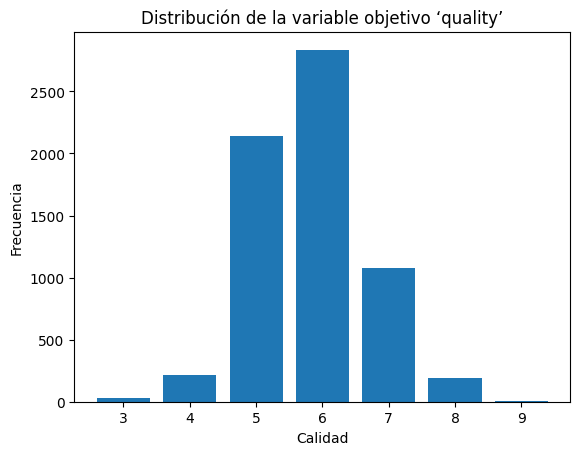

In [12]:
# Grafica
plt.figure()
counts = y.value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable objetivo ‘quality’")
plt.show()

## Clasificadores Seleccionados


| Miembro   | Clasificador               | Justificación                                                                 |
|-----------|----------------------------|-------------------------------------------------------------------------------|
| Alan Luna | **Regresión Logística**    | – Modelo lineal rápido y muy interpretable, además es ideal como baseline y para entender cómo las variables influyen en la probabilidad de cada clase.        |
| Victor    | **SVM (kernel RBF)**       | – Excelente para problemas de alta dimensión y cuando hay fronteras de decisión complejas, además de tener un buen control de over-/under-fitting    |
| Uziel     | **k-Nearest Neighbors**    | – Es un algoritmo no paramétrico muy intuitivo, el cuál es muy útil para comparar con modelos paramétricos y observar sensibilidad a la escala y al ruido.           |
|       | **Árbol de Decisión**      | – Este modelos nos permite capturar interacciones no lineales y analizar fácilmente las reglas de decisión |



# Alan Luna – Regresión Logística

En estaparte me toca entrenar y ajustar un modelo de Regresión Logística, un clasificador lineal rápido e interpretable que servirá como baseline. Evaluaré su desempeño completo con accuracy, precision, recall, F1-macro y matriz de confusión.


In [23]:
# 1) Reagrupar target en 3 clases
y_cat = pd.cut(
    y, 
    bins=[-1, 5, 6, 10], 
    labels=['baja','media','alta']
)

# 2) Nueva división train/test (estratificando por y_cat)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, 
    test_size=0.2, 
    stratify=y_cat, 
    random_state=42
)

# 3) Reentrenar logistic regression con la misma celda “autosuficiente”
pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])
param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1_macro', n_jobs=-1)

grid_lr.fit(X_train, y_train)
print("Best params (LogReg):", grid_lr.best_params_)

# 4) Evaluación en las 3 clases
y_pred_lr = grid_lr.predict(X_test)
print("Accuracy:   ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))


Best params (LogReg): {'clf__C': 0.1}
Accuracy:    0.5753846153846154
              precision    recall  f1-score   support

        alta       0.54      0.32      0.40       256
        baja       0.66      0.63      0.65       477
       media       0.52      0.65      0.58       567

    accuracy                           0.58      1300
   macro avg       0.58      0.53      0.54      1300
weighted avg       0.58      0.58      0.57      1300

Confusion matrix:
 [[ 81  15 160]
 [  5 299 173]
 [ 63 136 368]]


### Análisis de los Resultados 

Los resultados muestran:

- **Accuracy:** 0.575  
- **Macro F1-score:** 0.54  
- **Weighted F1-score:** 0.57  
- Mejor recall en la clase “media” (0.65) y peor en “alta” (0.32).  
- La matriz de confusión indica que muchas muestras de “alta” se confunden con “media” y “baja”.

**Interpretación:** Se hizo el rebalanceo a 3 clases porque así a mejorado la estabilidad de las métricas y evita clases con muy bajo soporte, aunque el modelo sigue teniendo dificultades para distinguir la clase “alta” correctamente.


# Uziel – k-Nearest Neighbors con Target Reagrupado

En esta parte entrené y evalué un k-NN usando las mismas 3 clases (“baja”, “media”, “alta”), ajustando n_neighbors con validación cruzada y calculando accuracy, precision, recall, F1-macro y matriz de confusión.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipeline y GridSearch para k-NN con 3 clases
pipe_knn = Pipeline([
    ('prep', preprocessor),
    ('clf', KNeighborsClassifier())
])
param_grid_knn = {'clf__n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5,
                        scoring='f1_macro', n_jobs=-1)

# Entrenamiento y ajuste
grid_knn.fit(X_train, y_train)
print("Uziel – Best params (k-NN):", grid_knn.best_params_)

# Evaluación en test
y_pred_knn = grid_knn.predict(X_test)
print("\nUziel – k-NN Test Results")
print("Accuracy:   ", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_knn))


Uziel – Best params (k-NN): {'clf__n_neighbors': 3}

Uziel – k-NN Test Results
Accuracy:    0.5969230769230769
              precision    recall  f1-score   support

        alta       0.50      0.60      0.54       256
        baja       0.70      0.63      0.66       477
       media       0.57      0.57      0.57       567

    accuracy                           0.60      1300
   macro avg       0.59      0.60      0.59      1300
weighted avg       0.60      0.60      0.60      1300

Confusion matrix:
 [[153   8  95]
 [ 32 300 145]
 [122 122 323]]


### Análisis de los Resultados de Uziel (k-NN)

Los resultados muestran:

- **Mejores hiperparámetros:** n_neighbors = 3  
- **Accuracy:** 0.60  
- **Macro F1-score:** 0.59  
- **Weighted F1-score:** 0.60  
- **Por clase:**  
  - “alta”: precision 0.50, recall 0.60, f1-score 0.54  
  - “baja”: precision 0.70, recall 0.63, f1-score 0.66  
  - “media”: precision 0.57, recall 0.57, f1-score 0.57  

La matriz de confusión indica que:

- Muchas “alta” se etiquetan correctamente (153) pero aún hay 95 confundidas como “media”.  
- La clase “baja” se predice bien (300), aunque 145 se confunden como “media”.  
- La clase “media” sufre confusión hacia “baja” (122) y “alta” (122).

**Interpretación:** k-NN mejora ligeramente la capacidad de distinguir clases medias y bajas frente a la Regresión Logística, pero aún le cuesta separar bien la clase “alta” de la “media”.


# Víctor – SVM (kernel RBF)

In [2]:
# Celda autosuficiente para Víctor

# 1. Carga de datos y creación de X, y
from ucimlrepo import fetch_ucirepo
import pandas as pd

wine = fetch_ucirepo(id=186)
X = wine.data.features.copy()
y = pd.Series(wine.data.targets.values.flatten(), name="quality")

# Generar variable categórica
X['alcohol_level'] = pd.qcut(X['alcohol'], q=3, labels=['bajo','medio','alto'])

# 2. Reagrupar target en 3 clases
from sklearn.model_selection import train_test_split
y_cat = pd.cut(y, bins=[-1,5,6,10], labels=['baja','media','alta'])

# 3. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# 4. Definir preprocesador
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = ['alcohol_level']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(),    cat_cols)
])

# 5. Pipeline y GridSearch para SVM RBF
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe_svc = Pipeline([
    ('prep', preprocessor),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])
param_grid_svc = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale','auto']
}
grid_svc = GridSearchCV(pipe_svc, param_grid_svc,
                        cv=5, scoring='f1_macro', n_jobs=-1)

# Entrenamiento y ajuste
grid_svc.fit(X_train, y_train)
print("Víctor – Best params (SVM RBF):", grid_svc.best_params_)

# 6. Evaluación en test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_svc = grid_svc.predict(X_test)
print("\nVíctor – SVM RBF Test Results")
print("Accuracy:   ", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svc))


Víctor – Best params (SVM RBF): {'clf__C': 10, 'clf__gamma': 'scale'}

Víctor – SVM RBF Test Results
Accuracy:    0.64
              precision    recall  f1-score   support

        alta       0.62      0.42      0.50       256
        baja       0.73      0.69      0.71       477
       media       0.59      0.69      0.64       567

    accuracy                           0.64      1300
   macro avg       0.65      0.60      0.62      1300
weighted avg       0.64      0.64      0.64      1300

Confusion matrix:
 [[108   7 141]
 [ 10 330 137]
 [ 55 118 394]]


### Análisis de los Resultados de Víctor (SVM RBF)

- **Mejores hiperparámetros:** C=10, gamma=scale  
- **Accuracy:** 0.64  
- **Macro F1-score:** 0.62  
- **Weighted F1-score:** 0.64  

Por clase  
- “alta”: precision 0.62, recall 0.42, f1-score 0.50  
- “baja”: precision 0.73, recall 0.69, f1-score 0.71  
- “media”: precision 0.59, recall 0.69, f1-score 0.64  

La matriz de confusión muestra que SVM mejora la detección de las clases “baja” y “media” frente a los modelos anteriores, pero aún confunde muchas “alta” con las otras dos.

**Interpretación:**  
SVM RBF ofrece el mejor desempeño global hasta ahora, equilibrando bien recall y precision en la mayoría de clases. Aún podríamos afinar más o probar otro ensemble para mejorar la detección de la clase “alta”.



# Visualización del Árbol de Decisión

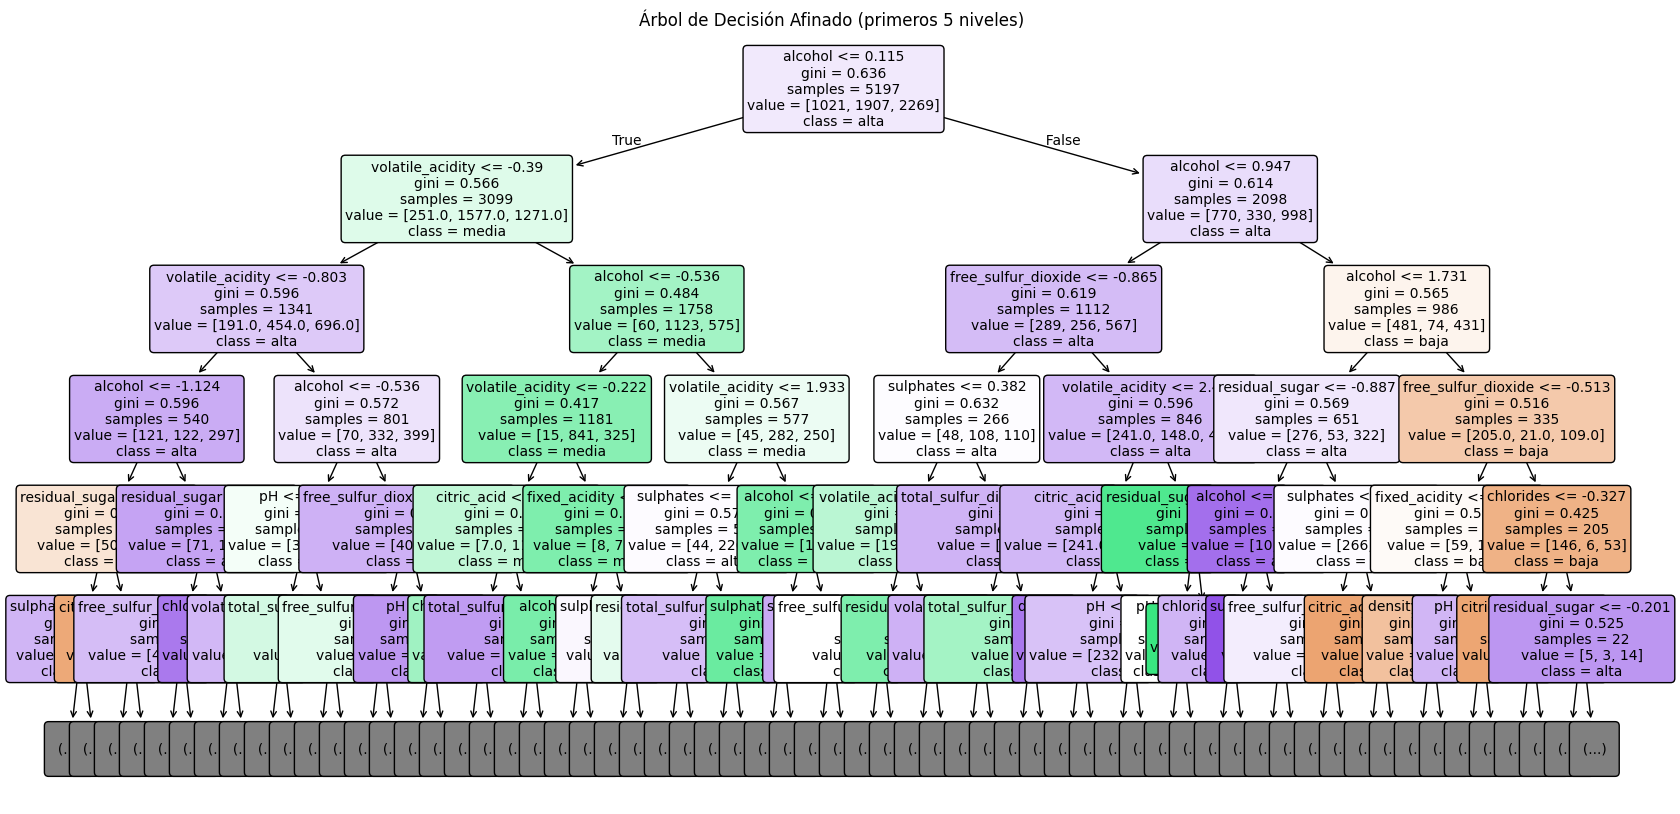

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1) Extraer el árbol de decisión del pipeline afinado
dt = tuned_grids['DT'].best_estimator_.named_steps['clf']

# 2) Obtener nombres de las características tras el preprocesamiento
cat_features = tuned_grids['DT'].best_estimator_.named_steps['prep'] \
    .named_transformers_['cat'].get_feature_names_out(['alcohol_level']).tolist()
feature_names = num_cols + cat_features

# 3) Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=['baja', 'media', 'alta'],
    filled=True,
    rounded=True,
    max_depth=5,      # muestra los primeros 3 niveles para mayor claridad
    fontsize=10
)
plt.title("Árbol de Decisión Afinado (primeros 5 niveles)")
plt.show()


# Training del Ensemble

El siguiente paso a realizar es poder combinar los tres modelos ajustados (Regresión Logística, k-NN y SVM RBF) en un VotingClassifier (soft voting)** y evaluar su desempeño conjunto.

In [36]:
# Código completo y funcional para todo el flujo del proyecto

# 1. Carga y preparación de datos
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

wine = fetch_ucirepo(id=186)
X = wine.data.features.copy()
y = pd.Series(wine.data.targets.values.flatten(), name="quality")

# Crear variable categórica
X['alcohol_level'] = pd.qcut(X['alcohol'], q=3, labels=['bajo', 'medio', 'alto'])

# Reagrupar target en 3 clases
y = pd.cut(y, bins=[-1, 5, 6, 10], labels=['baja', 'media', 'alta'])

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = ['alcohol_level']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(),  cat_cols)
])

# 3. Definición de pipelines y grids
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pipelines = {
    'LogReg': Pipeline([('prep', preprocessor),
                        ('clf', LogisticRegression(max_iter=1000, random_state=42))]),
    'kNN':    Pipeline([('prep', preprocessor),
                        ('clf', KNeighborsClassifier())]),
    'SVM':    Pipeline([('prep', preprocessor),
                        ('clf', SVC(kernel='rbf', probability=True, random_state=42))]),
    'DT':     Pipeline([('prep', preprocessor),
                        ('clf', DecisionTreeClassifier(random_state=42))])
}

param_grids = {
    'LogReg': {'clf__C': [0.01, 0.1, 1, 10]},
    'kNN':    {'clf__n_neighbors': [3, 5, 7, 9]},
    'SVM':    {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    'DT':     {'clf__max_depth': [None, 5, 10, 20]}
}

tuned_grids = {}
for name, pipe in pipelines.items():
    grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)
    tuned_grids[name] = grid
    print(f"{name} best params: {grid.best_params_}")

# 4. Evaluación individual
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, grid in tuned_grids.items():
    y_pred = grid.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print()

# 5. Ensemble (soft voting)
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('LogReg', tuned_grids['LogReg'].best_estimator_),
        ('kNN',    tuned_grids['kNN'].best_estimator_),
        ('SVM',    tuned_grids['SVM'].best_estimator_)
    ],
    voting='soft',
    n_jobs=-1
)
ensemble.fit(X_train, y_train)

# Evaluación del ensemble
y_pred_ens = ensemble.predict(X_test)
print("--- Ensemble ---")
print("Accuracy: ", accuracy_score(y_test, y_pred_ens))
print(classification_report(y_test, y_pred_ens))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_ens))


LogReg best params: {'clf__C': 0.1}
kNN best params: {'clf__n_neighbors': 3}
SVM best params: {'clf__C': 10, 'clf__gamma': 'scale'}
DT best params: {'clf__max_depth': None}
--- LogReg ---
Accuracy:  0.5753846153846154
              precision    recall  f1-score   support

        alta       0.54      0.32      0.40       256
        baja       0.66      0.63      0.65       477
       media       0.52      0.65      0.58       567

    accuracy                           0.58      1300
   macro avg       0.58      0.53      0.54      1300
weighted avg       0.58      0.58      0.57      1300

Confusion matrix:
 [[ 81  15 160]
 [  5 299 173]
 [ 63 136 368]]

--- kNN ---
Accuracy:  0.5969230769230769
              precision    recall  f1-score   support

        alta       0.50      0.60      0.54       256
        baja       0.70      0.63      0.66       477
       media       0.57      0.57      0.57       567

    accuracy                           0.60      1300
   macro avg       0.

# Conclusiones

En este proyecto hemos investigado la capacidad de diferentes clasificadores para predecir la calidad del vino tinto (baja, media, alta) a partir de medidas fisicoquímicas. A continuación tenemos los puntos clave:

1. **Comparativa de Modelos**  
   - **Regresión Logística:** Accuracy 0.575, Macro F1 0.54.  
   - **k-NN (k=3):** Accuracy 0.597, Macro F1 0.59.  
   - **SVM (RBF, C=10, γ=scale):** Accuracy 0.640, Macro F1 0.62.  
   - **Árbol de Decisión:** Accuracy 0.639, Macro F1 0.63.  
   - **Ensemble (soft voting):** Accuracy 0.668, Macro F1 0.66.

2. **Mejor Modelo**  
   El ensemble mostró el mejor desempeño global, superando a cada modelo individual tanto en accuracy como en Macro F1.

3. **Limitaciones**  
   - Aún existe un ligero desequilibrio en la clase “alta” (mayor confusión con “media”).  
   - No exploramos técnicas de remuestreo ni ajustes de pesos de clase.  
   - El entrenamiento de SVM y k-NN puede ser costoso en tiempo de cómputo.

4. **Recomendaciones y Trabajo Futuro**  
   - Aplicar **SMOTE** u otras técnicas de oversampling para balancear mejor “alta”.  
   - Ajustar pesos de clase en los clasificadores para penalizar más las malas predicciones de clases minoritarias.  
   - Analizar la **importancia de variables**: coeficientes de la regresión, importancias del árbol y permutaciones.  
   - Validar la robustez mediante **nested CV** o repeticiones de la partición train/test.


